In [13]:
%matplotlib inline
#Import necessary libraries for calculation
from sklearn.ensemble import RandomForestClassifier #Necessary for training
import pandas as pd #Necessary for importing the data
import matplotlib.pyplot as plt #Necessary for plotting the data 

In [14]:
#Import training and test data - in this case madelon_train and madelon_valid
train = pd.read_csv('madelon/madelon_train.data', delimiter=" ", header=None)
test = pd.read_csv('madelon/madelon_valid.data', delimiter=" ", header=None)
#Import training and test labels - in this case madelon_train and madelon_valid
train_labels = pd.read_csv('madelon/madelon_train.labels', delimiter=" ", header=None)
test_labels = pd.read_csv('madelon/madelon_valid.labels', delimiter=" ", header=None)
#Drop or remove the last column - 500 - because the values are all NaN and therefore useless
train.drop([500], axis=1, inplace=True)
test.drop([500], axis=1, inplace=True)

In [15]:
'''
Misclassification Error - Calculating the number of incorrect classifications
   - y1 and y2 are parameters that will take in training and test data and labels
   - The output will essentially translate into an error percentage. This shows us how
     accurate our training and testing is
'''

def calc_misclassification_error(y1, y2):
    cnt = 0 #Setting the counter
    for i in range(len(y1)):
        if y1[i] != y2[i]: #If train/test data is not equal to train/test label
            cnt += 1 #Increase counter 
    #Maps the incorrect classification of the label into an object
    n_misclassification = len([item1 for item1, item2 in zip(y1, y2) if item1 != item2]) 
    return (cnt/len(y1))*100.0 #Returns error percentage 

In [16]:
'''
Here we will create a function that will train and plot the data.
Our parameters will consist of:
   - train - train data
   - train_labels - training label
   - test - test data
   - test_labels - test label
   - k - number of trees, which for this example is 3,10,30,100,300
   - _label - features label/print *optional* 
   - method_max_features - number of features for the split attribute at each node
'''

def plot_accuracy(train, train_labels, test, test_labels, k, _label, method_max_features):
    print("Max Features=", _label)
    train_acc = []
    test_acc = []
    #Iterate through a list of trees, where each tree is k
    for nestimators in k:
        #Here we train the classifier using sklearns model and the parameters we know
        clf = RandomForestClassifier(
            n_estimators=nestimators, max_features=method_max_features)
        clf.fit(train, train_labels[0]) #Fit training data
        train_preds = clf.predict(train) #Train the model using training data
        #Add/collect the misclassification percentage between the newly trained model
        train_acc.append(calc_misclassification_error(train_preds, train_labels[0]))
        test_preds = clf.predict(test) #Train the model using the testing data
        #Add/collect the misclassification percentage between the newly trained model
        test_acc.append(calc_misclassification_error(test_preds, test_labels[0]))
    #Plot the trees against the misclassification error of the training and testing model
    plt.figure()
    plt.plot(k, train_acc, 'r', label="Train misclassification error")
    plt.plot(k, test_acc, 'b', label="Test misclassification error")
    plt.legend()
    plt.title(
        "Traning and Testing misclassification error for max features {}".format(_label))
    #Create a dataframe *optional - helps with readability* for textual representation of the error
    
    res_df = pd.DataFrame.from_dict(
        {"k": k, "Train Error": train_acc, "Test Error": test_acc})
    print(res_df.head())

Max Features= sqrt(500)
     k  Train Error  Test Error
0    3         7.35   44.666667
1   10         1.35   34.333333
2   30         0.00   30.333333
3  100         0.00   27.666667
4  300         0.00   26.000000
Max Features= ln(500)
     k  Train Error  Test Error
0    3         9.15   46.833333
1   10         1.65   44.833333
2   30         0.00   40.166667
3  100         0.00   37.500000
4  300         0.00   36.333333
Max Features= 500
     k  Train Error  Test Error
0    3         4.05   26.000000
1   10         1.05   20.666667
2   30         0.05   17.833333
3  100         0.00   15.500000
4  300         0.00   14.333333


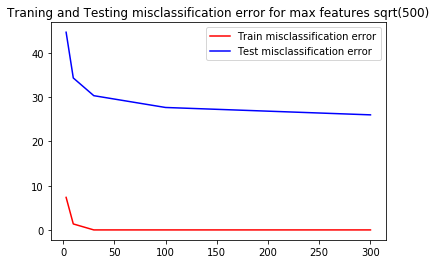

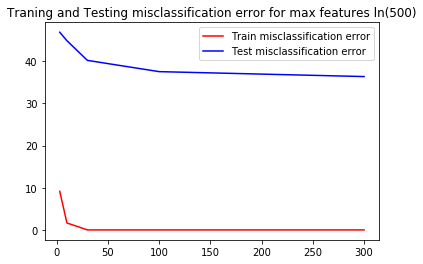

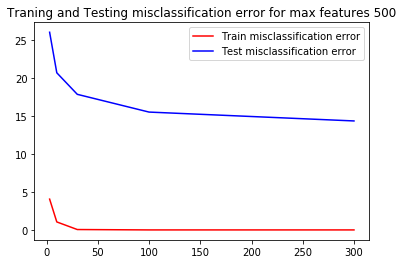

In [17]:
#Call and display model
plot_accuracy(train, train_labels, test, test_labels, [
              3, 10, 30, 100, 300],  "sqrt(500)", "sqrt")
plot_accuracy(train, train_labels, test, test_labels, [
              3, 10, 30, 100, 300], "ln(500)", 0.012)
plot_accuracy(train, train_labels, test, test_labels,
              [3, 10, 30, 100, 300], "500", None)
plt.show()